## 4.2 심파이를 사용한 함수 미분

이 절에서는 함수의 미분에 대해 공부한다. 우선 데이터 분석을 하는데 미분이 필요한 이유에 대해 설명한다. 몇가지 간단한 미분 공식을 사용하여 손으로 미분하는 연습을 한 후에 파이썬으로 미분을 하는 방법을 알아본다.

### 예측 모형의 성능

데이터 분석의 목표는 예측 오차가 가장 작은 최적의 예측모형을 구하는 일이다. 최적의 모형을 구하기 위해 우리가 할 수 있는 일은 예측모형 함수의 계수(coefficient)를 바꾸는 것이다. 예측모형 함수의 계수를 모수라고도 한다. 예를 들어 다음과 같은 선형예측모형을 사용하는 경우,

$$ 
\begin{align}
\hat{y} = w_1 x_1 +  w_2 x_2 + \ldots +  w_N x_N  = w^T x 
\tag{4.2.1}
\end{align}
$$

우리가 결정할 수 있는 것은 선형예측모형의 가중치 $w$, 즉 $w_1, w_2, \ldots, w_N$의 값이다. 이 가중치 $w$의 값이 모수이다.

모수를 어떤 숫자로 정하느냐에 따라 예측모형의 성능(performance)이 달라진다. 성능은 크기를 비교할 수 있어야 하므로 항상 스칼라인 숫자가 되어야 한다. 따라서 모수를 결정하여 성능을 측정하는 일련의 과정은 다음처럼 다변수 함수를 계산하는 것과 같다. 이 함수를 성능함수(performance function)이라고 한다.
성능함수의 값은 클수록 좋다. 

이와는 반대로 모수를 입력받아 오차 혹은 오류의 크기를 출력하는 함수를 가장 작게 하는 것을 목표로 할 수도 있다. 이러한 함수는 **손실함수(loss function)**, **비용함수(cost function)**, 또는 **오차함수(error function)**라고 부른다.

성능함수, 손실함수, 비용함수, 오차함수 등 최적화의 대상이 되는 함수를 통틀어 **목적함수(objective function)**라고 한다.


우리가 원하는 것은 목적함수가 주어졌을 때 이 목적함수의 값을 가장 크게 혹은 적게 할 수 있는 입력값, 즉 모수를 구하는 것이다. 이를 **최적화(optmization)**라고 한다. 최적화를 하기 위해서는 입력값이 변했을 때 함수의 출력값이 어떻게 달라지는지를 정량적으로 알아야 한다. 이러한 과정이 **미분(differentiation)**이다. 따라서 미분을 모르고 올바른 데이터 분석은 불가능하다.

<img src="https://datascienceschool.net/upfiles/883f9a06faf54a2da213679b1589442a.png" style="width:100%;">

그림 4.2.1 : 손실 함수 

#### 예제

조절나사의 각도 $x$를 설정하여 출력되는 음량 $y$을 제어하는 앰프가 있다. 그런데 이 앰프가 다음 그림과 같이 조절나사의 각도와 음량이 정비례하지 않는 앰프라고 하자. 출력 음량이 최대가 되는 조절나사의 각도를 찾는 문제는 변수 $x$에 대한 최적화 문제라고 할 수 있다.

<img src="https://datascienceschool.net/upfiles/2330af56eab04a60abb081672078c236.png" style="width:100%;">

그림 4.2.2 : 생활 속의 최적화 예

### 기울기

수치적 최적화는 가장 적은 횟수로 여러가지 $x$값을 시도하여 최적의 값을 찾는 방법이다.  수치적 최적화를 하려면 어떤 $x_1$값을 시도한 후 다음 번에 다른 $x_2$값으로 어떤 값이 더 좋을지 알아야 한다.  만약 $x_1$ 위치에서는 $x$를 증가시켰을 때 $y$값이 증가한다는 것을 알 고 있다면 $x_2$값은 $x_1$보다 더 큰 값을 쓰는 것이 좋다. 반대로 $x_1$ 위치에서는 $x$를 증가시켰을 때 $y$값이 감소한다면 $x_2$값은 $x_1$보다 더 작은 값을 쓰는 것이 좋다. 이 정보를 **기울기(slope)** 혹은 **민감도(sensitivity)**라고 한다.  

앰프에 비유하자면 조절나사를 오른쪽으로 1도만큼 돌렸을 때 소리가 커지는지 작아지는지를 안다면 소리를 크게 하기 위해 왼쪽으로 돌릴지 오른쪽으로 돌릴지를 결정할 수 있는 것과 마찬가지다. 

만약 입력변수의 값이 $x$에서 $x_2$로 $\Delta x = x_2 - x$만큼 달라졌다고 가정하자. 출력변수는 $f(x)$이라는 값에서 $f(x_2)$라는 값으로 $\Delta y = f(x_2) - f(x)$만큼 달라질 것이다. 이를 비율로 나타내면 다음과 같다. 

$$ 
\begin{align}
\dfrac{\Delta y}{\Delta x} = \dfrac{f(x_2) - f(x)}{x_2 - x} = \dfrac{f(x + \Delta x) - f(x)}{\Delta x} 
\tag{4.2.2}
\end{align}
$$

그런데 이 방식으로 계산한 변화율은 $x_2$가 $x_1$에서 얼마나 멀리 떨어져 있는가 즉, $\Delta x$의 크기에 따라 달라진다. 이를 해결하기 위해 **기울기(slope)**라는 개념을 사용한다. 기울기는 $dx$값이 0으로 근접할 때의 변화율을 말한다. 기호로는 다음처럼 쓴다.

$$ 
\begin{align}
\text{slope} = \lim_{\Delta x \rightarrow 0} \dfrac{f(x + \Delta x) - f(x)}{\Delta x} 
\tag{4.2.3}
\end{align}
$$


이번에는 기울기를 함수의 그래프에서 살펴보자. 함수의 그래프는 앞에서 그린 것처럼 부드러운 곡선(curve)의 형태로 나타나는 경우가 많다. 이 곡선에 대해 한 점만 공통으로 가지는 접선(tangent)을 그릴 수 있는데 이 접선이 수평선과 이루는 기울기는 접선이 $x$ 방향으로 이동한 거리와 $y$ 방향으로 이동한 거리의 비율을 말한다.


#### 예제

다음과 같은 3차 함수를 생각하자.

$$
\begin{align}
x^3 - 3x^2 + x
\tag{4.2.4}
\end{align}
$$

그래프에서 $x=0$과 $x=1$에서의 기울기는 각각 $1$, $-2$임을 알 수 있다.

$$
\begin{align}
x=0 \;\;\rightarrow\;\; \text{slope} = \dfrac{1}{1} = 1
\tag{4.2.5}
\end{align}
$$

$$
\begin{align}
x=1 \;\;\rightarrow\;\; \text{slope} = \dfrac{-2}{1} = -2
\tag{4.2.6}
\end{align}
$$

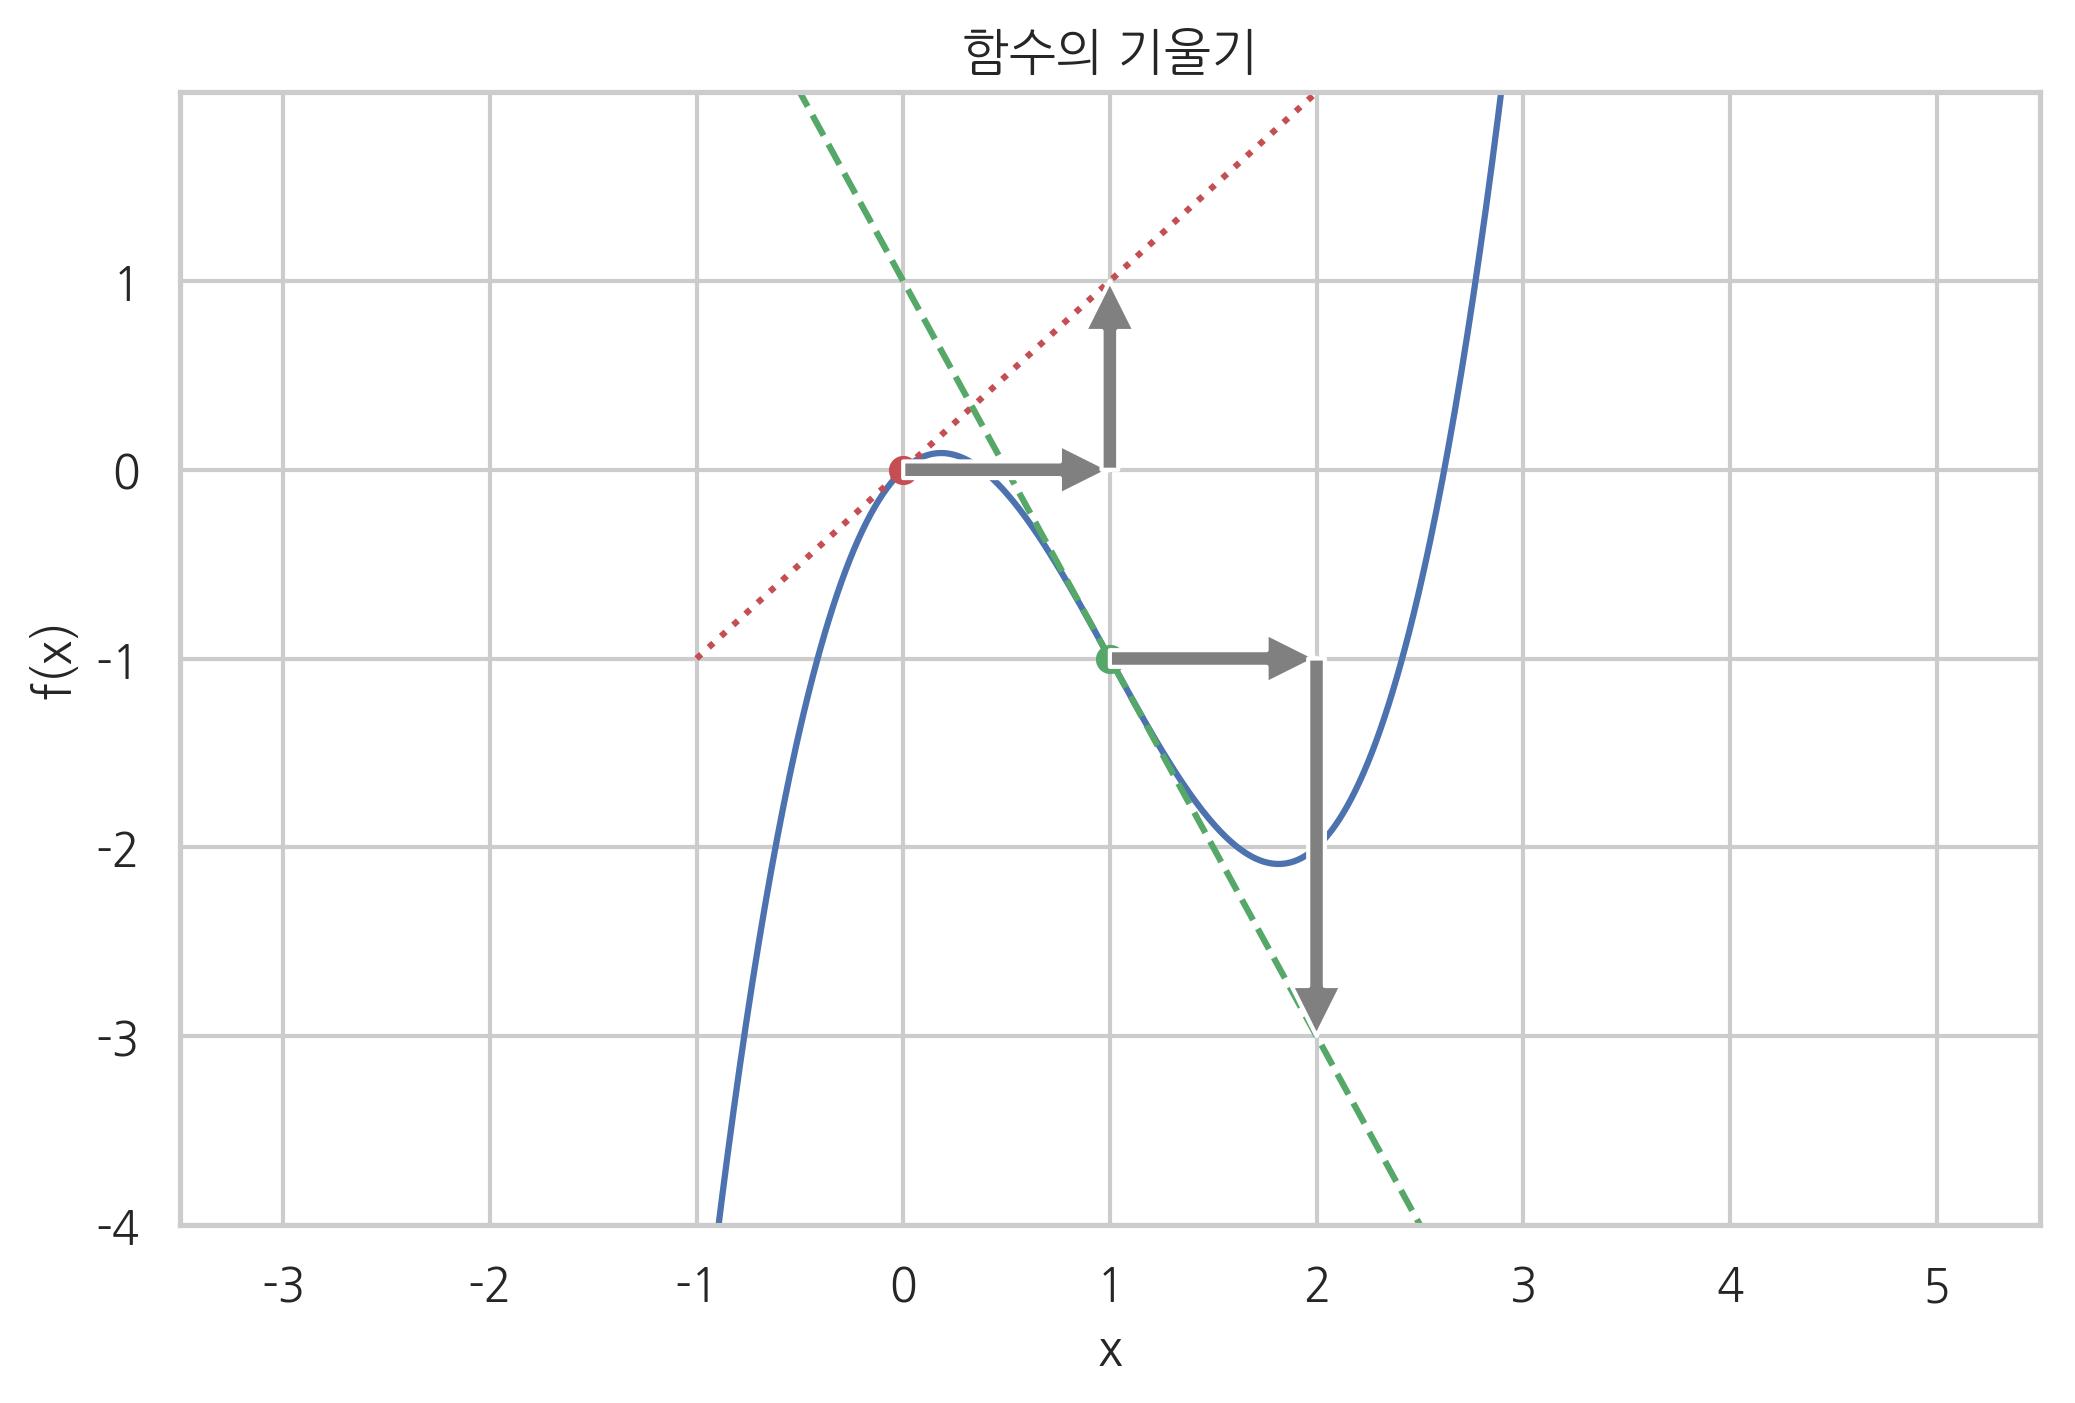

In [1]:
def f(x):
    return x**3 - 3 * x**2 + x

x = np.linspace(-1, 3, 400)
y = f(x)

plt.plot(x, y)
plt.plot(0, 0, 'ro')
plt.plot(x, x, 'r:')
plt.plot(1, -1, 'go')
plt.plot(x, (3*1**2-6*1+1)*(x-1)-1, 'g--')

plt.xlim(-3.5, 5.5)
plt.ylim(-4, 2)
plt.xticks(np.arange(-3, 6))
plt.yticks(np.arange(-4, 2))

plt.annotate('', xy=(1, 0), xytext=(0, 0), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(1, 1), xytext=(1, 0), arrowprops=dict(facecolor='gray'))

plt.annotate('', xy=(2, -1), xytext=(1, -1), arrowprops=dict(facecolor='gray'))
plt.annotate('', xy=(2, -3), xytext=(2, -1), arrowprops=dict(facecolor='gray'))

plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("함수의 기울기")
plt.show()

#### 연습 문제 4.2.1

앞의 그래프를 참고하여 다음 표의 $x$ 값들에 대해 기울기의 값이 얼마쯤인지 대략적으로 가늠하여 적어본다.

| $x$  | $-0.5$ |  $0$  |  $0.5$ |  $1$  |  $1.5$ |  $2$  |  $2.5$ |
| ---- |---- | --- | ---- | --- | ---- | --- | ---- |
| 기울기 | $  $  |   $1$ | $ $ |  $-2$  | $ $ | $  $ | $ $ | 


### 수치미분

scipy.misc 패키지의 ``derivative()`` 명령을 사용하면 수치적으로 대략적인 기울기를 계산할 수 있다. 인수로는 기울기를 구하고자 하는 함수 `f`, 기울기를 구할 위치 `x`, 기울기를 구하기 위해 이동할 거리 `dx`를 받는다. 다음 수식으로 대략적인 기울기는 구한다. 

$$ 
\begin{align}
\text{slope} \approx \dfrac{f\left(x + \dfrac{1}{2}dx\right) - f\left(x - \dfrac{1}{2}dx\right)}{dx} 
\tag{4.2.7}
\end{align}
$$

이렇게 기울기를 구하는 방법을 **수치미분(numerical differentiation)**이라고 한다. 수치 미분으로는 대략적인 기울기를 구할 뿐 정확한 값을 구할 수 없다.  `derivative()` 명령을 사용할 때는 기울기를 구하기 위해 이동할 거리 $dx$를 세 번째 인수로 넣어야 한다. 이 숫자는 작을 수록 좋지만 너무 작을 경우에는 부동소수점 연산의 오버플로우 오류로 인해 오히려 오차를 증폭할 수도 있으므로 조심하여야 한다.

#### 예제

위 예제의 3차 다항식의 기울기를 $x=0$, $x=1$ 지점에서 수치미분으로 구하는 코드는 다음과 같다. $dx$값은 100만분의 1로 설정하였다.

In [2]:
from scipy.misc import derivative

print(derivative(f, 0, dx=1e-6))
print(derivative(f, 1, dx=1e-6))

1.000000000001
-2.000000000002


### 미분

**미분(differentiation)**이란 **어떤 함수로부터 그 함수 기울기를 출력하는 새로운 함수를 만들어내는 작업**이다. 미분으로 만들어진 함수를 원래 함수의 **도함수(derivative)**라고 한다. 원래는 수렴(converge)과 극한(limit)이라는 수학적인 개념을 사용하여 미분을 정의하지만 여기에서는 자세한 설명을 생략한다.

도함수는 원래 함수에 프라임(prime) 기호($'$)를 붙이거나 원래 함수의 앞에 $\dfrac{d}{dx}$를 붙여서 표시한다. 분수처럼 표기하기도 하는데 분모의 위치에는 미분하고자 하는 변수가 오고 분자의 위치에는 미분하는 함수 자체의 기호나 혹은 함수 계산의 결과로 얻어지는 출력 변수를 넣는다. 예를 들어 $y = f(x)$라는 함수를 미분하여 구한 도함수는 다음과 같이 여러가지 방법으로 표기할 수 있다. 도함수의 표기는 분수와 비슷하지만 분수의 기호만 빌려온 것일 뿐 분수가 아니라는 점에 주의한다. 

$$ 
\begin{align}
f' = \dfrac{d}{dx}(f) = \dfrac{d}{dx}f = \dfrac{df}{dx}  = \dfrac{d}{dx}(y) = \dfrac{d}{dx}y = \dfrac{dy}{dx} 
\tag{4.2.8}
\end{align}
$$

이 식에서 $f'$는 "f 프라임(prime)"이라고 읽고 $\dfrac{df}{dx}$는 "df 오버(over) dx"라고 읽는다.

#### 연습 문제 4.2.2

앞절에서 구한 기울기 값 표를 이용하여 도함수의 그래프를 그려본다.

### 미분 가능

함수에 따라서는 어떤 점에서는 기울기 값을 정의하기 어려울 수가 있다. 예를 들어 다음 함수는 $x=0$인 위치에서 기울기를 정의할 수 없다. 이런 경우에는 $x=0$에서 **미분 불가능(not differentiable)**이라고 한다. 반대로 기울기를 구할 수 있으면 **미분 가능(differentiable)**이라고 한다.

#### 예제

ReLU 함수는 $x<0$인 구간에서는 기울기가 0이고 $x>0$인 구간에서는 기울기가 1이지만 $x=0$인 위치에서는 미분할 수 없다.

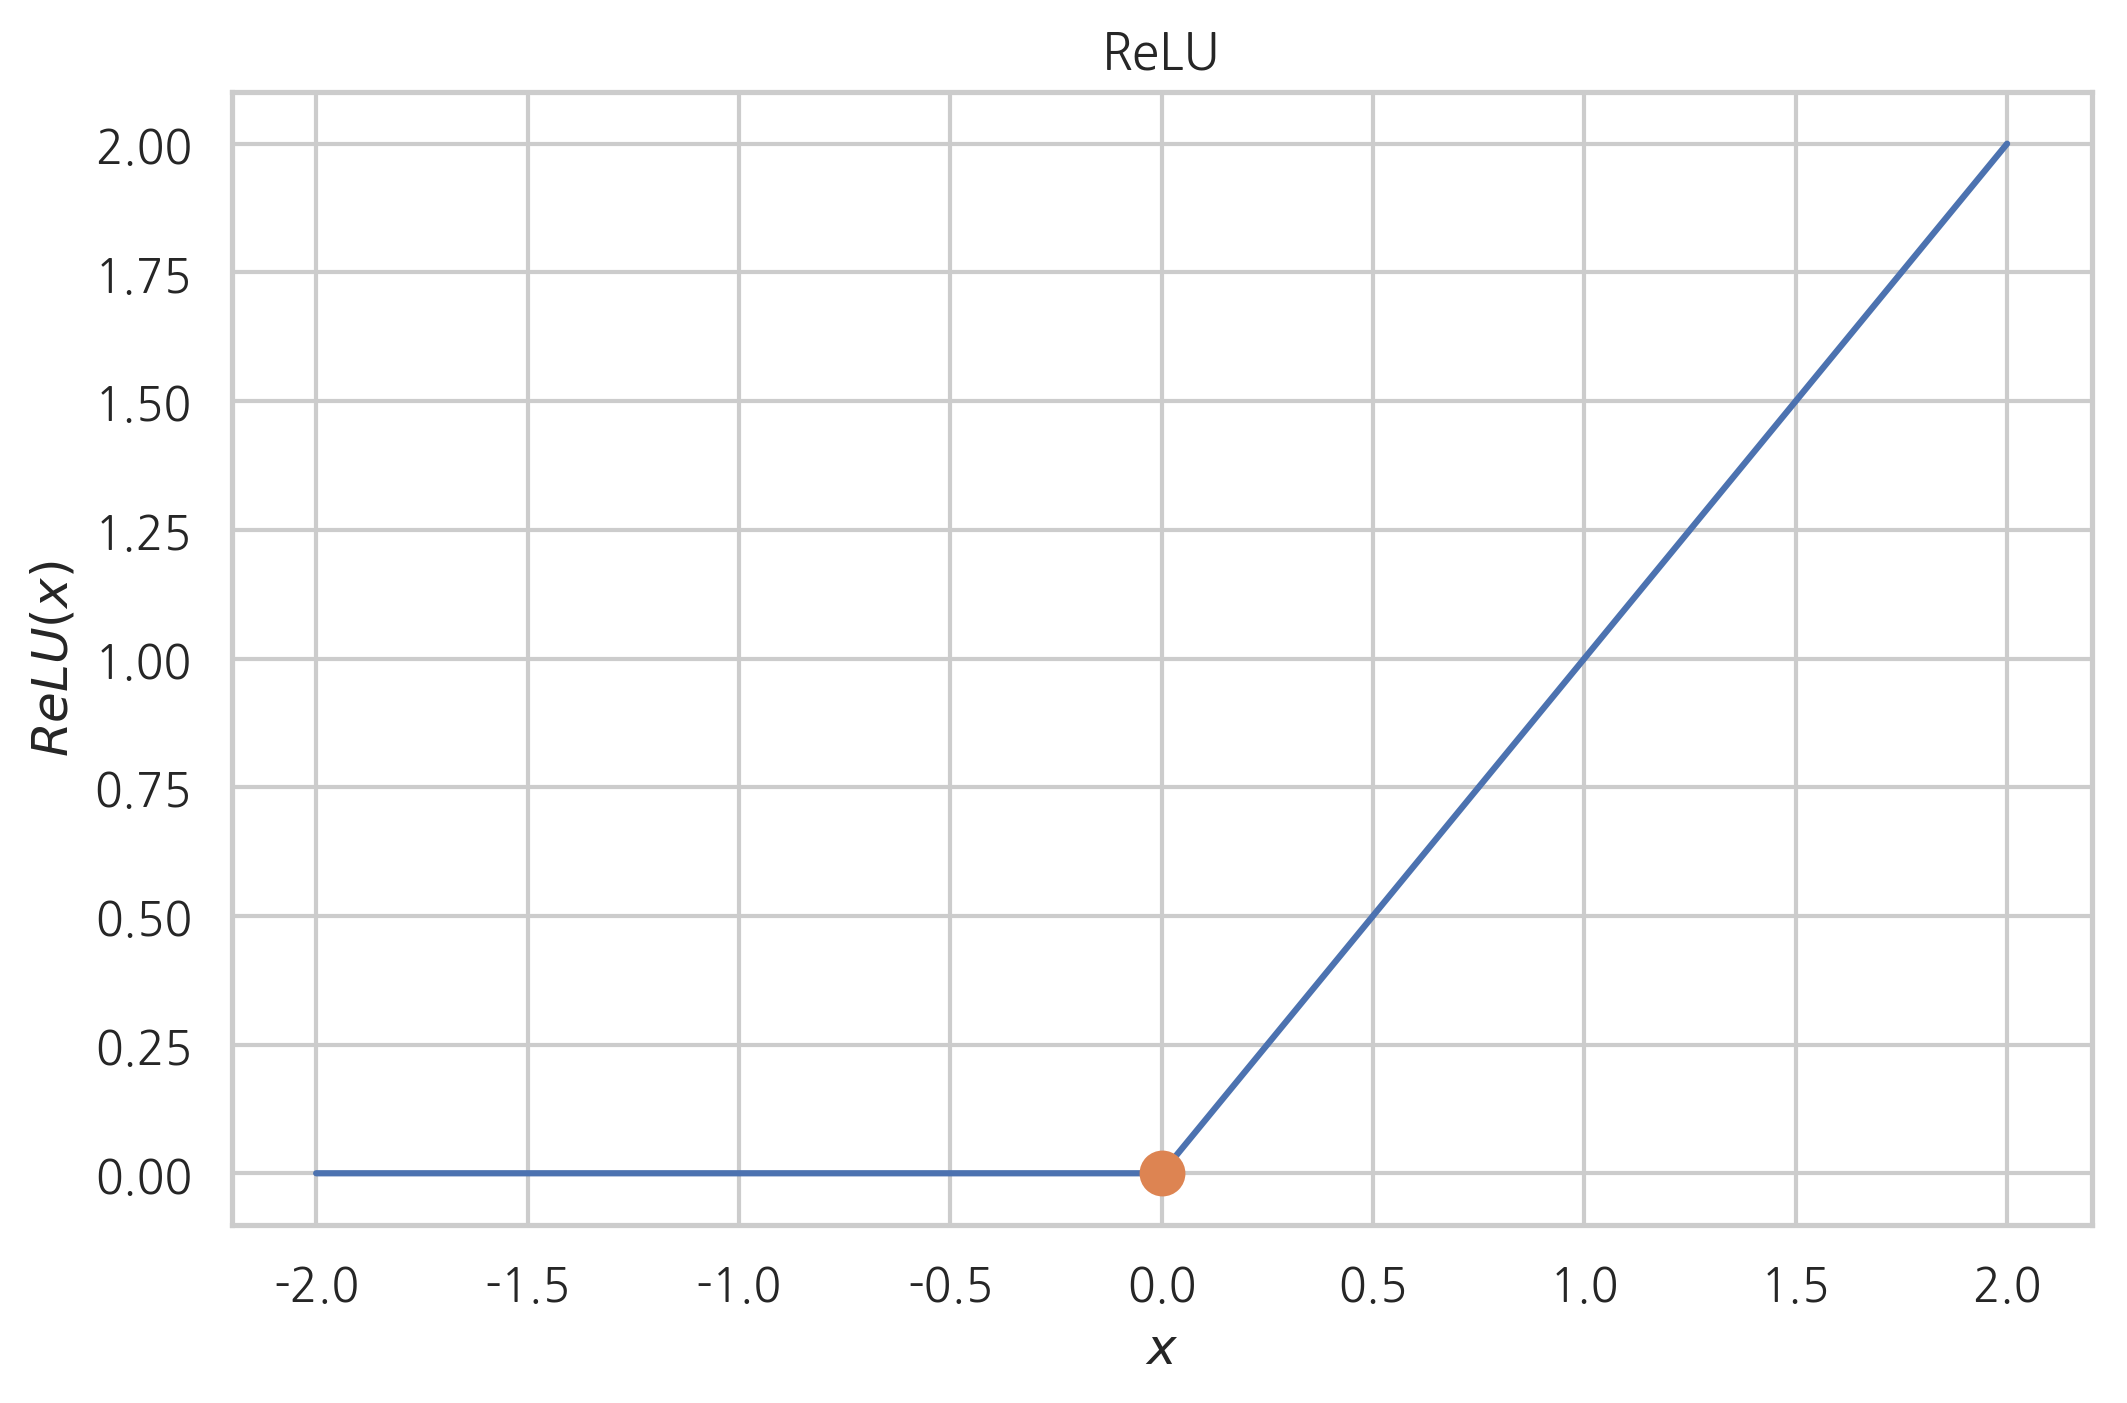

In [3]:
def relu(x):
    return np.where(x > 0, x, 0)


xx = np.linspace(-2, 2, 100)
plt.plot(xx, relu(xx))
plt.plot(0, 0, marker='o', ms=10)
plt.title("ReLU")
plt.xlabel("$x$")
plt.ylabel("$ReLU(x)$")
plt.show()

### 미분공식

몇가지 미분공식을 조합하면 복잡한 함수의 도함수도 쉽게 구할 수 있다.  여기에서는 가장 핵심적인 4가지 공식만을 소개한다. 

* 기본 미분공식
* 선형조합법칙
* 곱셈법칙
* 연쇄법칙

### 기본 미분공식

기본 미분공식은 상수, 거듭제곱, 로그함수, 지수함수 등의 간단한 함수에 대한 미분공식이다.

#### 상수

상수를 미분하면 0이 된다.

$$ 
\begin{align}
\dfrac{d}{dx}(c) = 0 
\tag{4.2.9}
\end{align}
$$

#### 거듭제곱

$x$의 $n$ 제곱을 미분하면 $n-1$ 제곱으로 제곱수가 1씩 감소한다. 이 공식은 $n$이 자연수이거나 음의 정수일 때 성립한다. $n=0$일 때는 성립하지 않는다.

$$ 
\begin{align}
\dfrac{d}{dx}(x^n) = n x^{n-1} 
\tag{4.2.10}
\end{align}
$$

#### 예제

거듭제곱공식을 응용하면 다음과 같이 미분할 수 있다.

$$ 
\begin{align}
\begin{aligned}
\dfrac{d}{dx}&\left(x^3\right) &\;\;&&=& \;\;\;\; 3 x^2 \\
\dfrac{d}{dx}&\left(x^2\right) &=\;\;& 2 x^1 &=& \;\;\;\; 2x \\
\dfrac{d}{dx}&\left(x\right)   &=\;\;& x^1 = 1 \cdot x^0 &=& \;\;\;\; 1 \\
\dfrac{d}{dx}&\left(\dfrac{1}{x}\right)   &=\;\;& \dfrac{d}{dx}x^{-1} = -1 x^{-2} &=& -\dfrac{1}{x^2} \\
\dfrac{d}{dx}&\left(\dfrac{1}{x^2}\right) &=\;\;& \dfrac{d}{dx}x^{-2} = -2 x^{-3} &=& -\dfrac{2}{x^3} \\
\dfrac{d}{dx}&\left(\dfrac{1}{x^3}\right) &=\;\;& \dfrac{d}{dx}x^{-3} = -3 x^{-4} &=& -\dfrac{3}{x^4} 
\end{aligned}
\tag{4.2.11}
\end{align}
$$


#### 로그

로그함수를 미분하면 $x^{-1}$이 된다.

$$ 
\begin{align}
\dfrac{d}{dx}(\log x) = \dfrac{1}{x} 
\tag{4.2.12}
\end{align}
$$

#### 지수

밑이 오일러 수인 지수함수는 미분해도 변하지 않는다.

$$ 
\begin{align}
\dfrac{d}{dx}(e^x) = e^x
\tag{4.2.13}
\end{align}
$$

### 선형조합법칙

어떤 함수에 상수를 곱한 함수를 미분한 결과는 원래 함수의 도함수에 그 상수를 곱한 것과 같다.

$$ 
\begin{align}
\dfrac{d}{dx}(cf) = c \cdot \dfrac{df}{dx}
\tag{4.2.14}
\end{align}
$$

어떤 두 함수를 더한 함수를 미분한 결과는 원래 함수의 도함수를 더한 것과 같다.

$$ 
\begin{align}
\dfrac{d}{dx}\left(f_1 + f_2\right) = \dfrac{df_1}{dx} +  \dfrac{df_2}{dx}
\tag{4.2.15}
\end{align}
$$


위의 결과를 합치면 어떤 함수에 각각 상수를 곱한 후 더한 **선형조합(linear combination)**은 각 함수의 도함수를 선형조합한 것과 같다.

$$ 
\begin{align}
\dfrac{d}{dx}\left(c_1 f_1 + c_2 f_2 \right) = c_1 \dfrac{df_1}{dx} + c_2 \dfrac{df_2}{dx}
\tag{4.2.16}
\end{align}
$$


#### 예제

$$
\begin{align}
y = 1 + 2x + 3x^2 + 4\exp(x) + 5\log(x)
\tag{4.2.17}
\end{align}
$$ 

답은 다음과 같다.

$$
\begin{align}
\dfrac{dy}{dx} = 2 + 6x + 4\exp(x) + \dfrac{5}{x}
\tag{4.2.18}
\end{align}
$$

#### 예제

같은 방법으로 위에서 그래프를 그렸던 함수의 도함수를 구하면 다음과 같다.

$$
\begin{align}
f(x) = x^3 - 3x^2 + x
\tag{4.2.19}
\end{align}
$$

$$
\begin{align}
f'(x) = 3x^2 - 6x + 1
\tag{4.2.20}
\end{align}
$$

도함수의 값이 기울기와 일치하는 것을 알 수 있다.

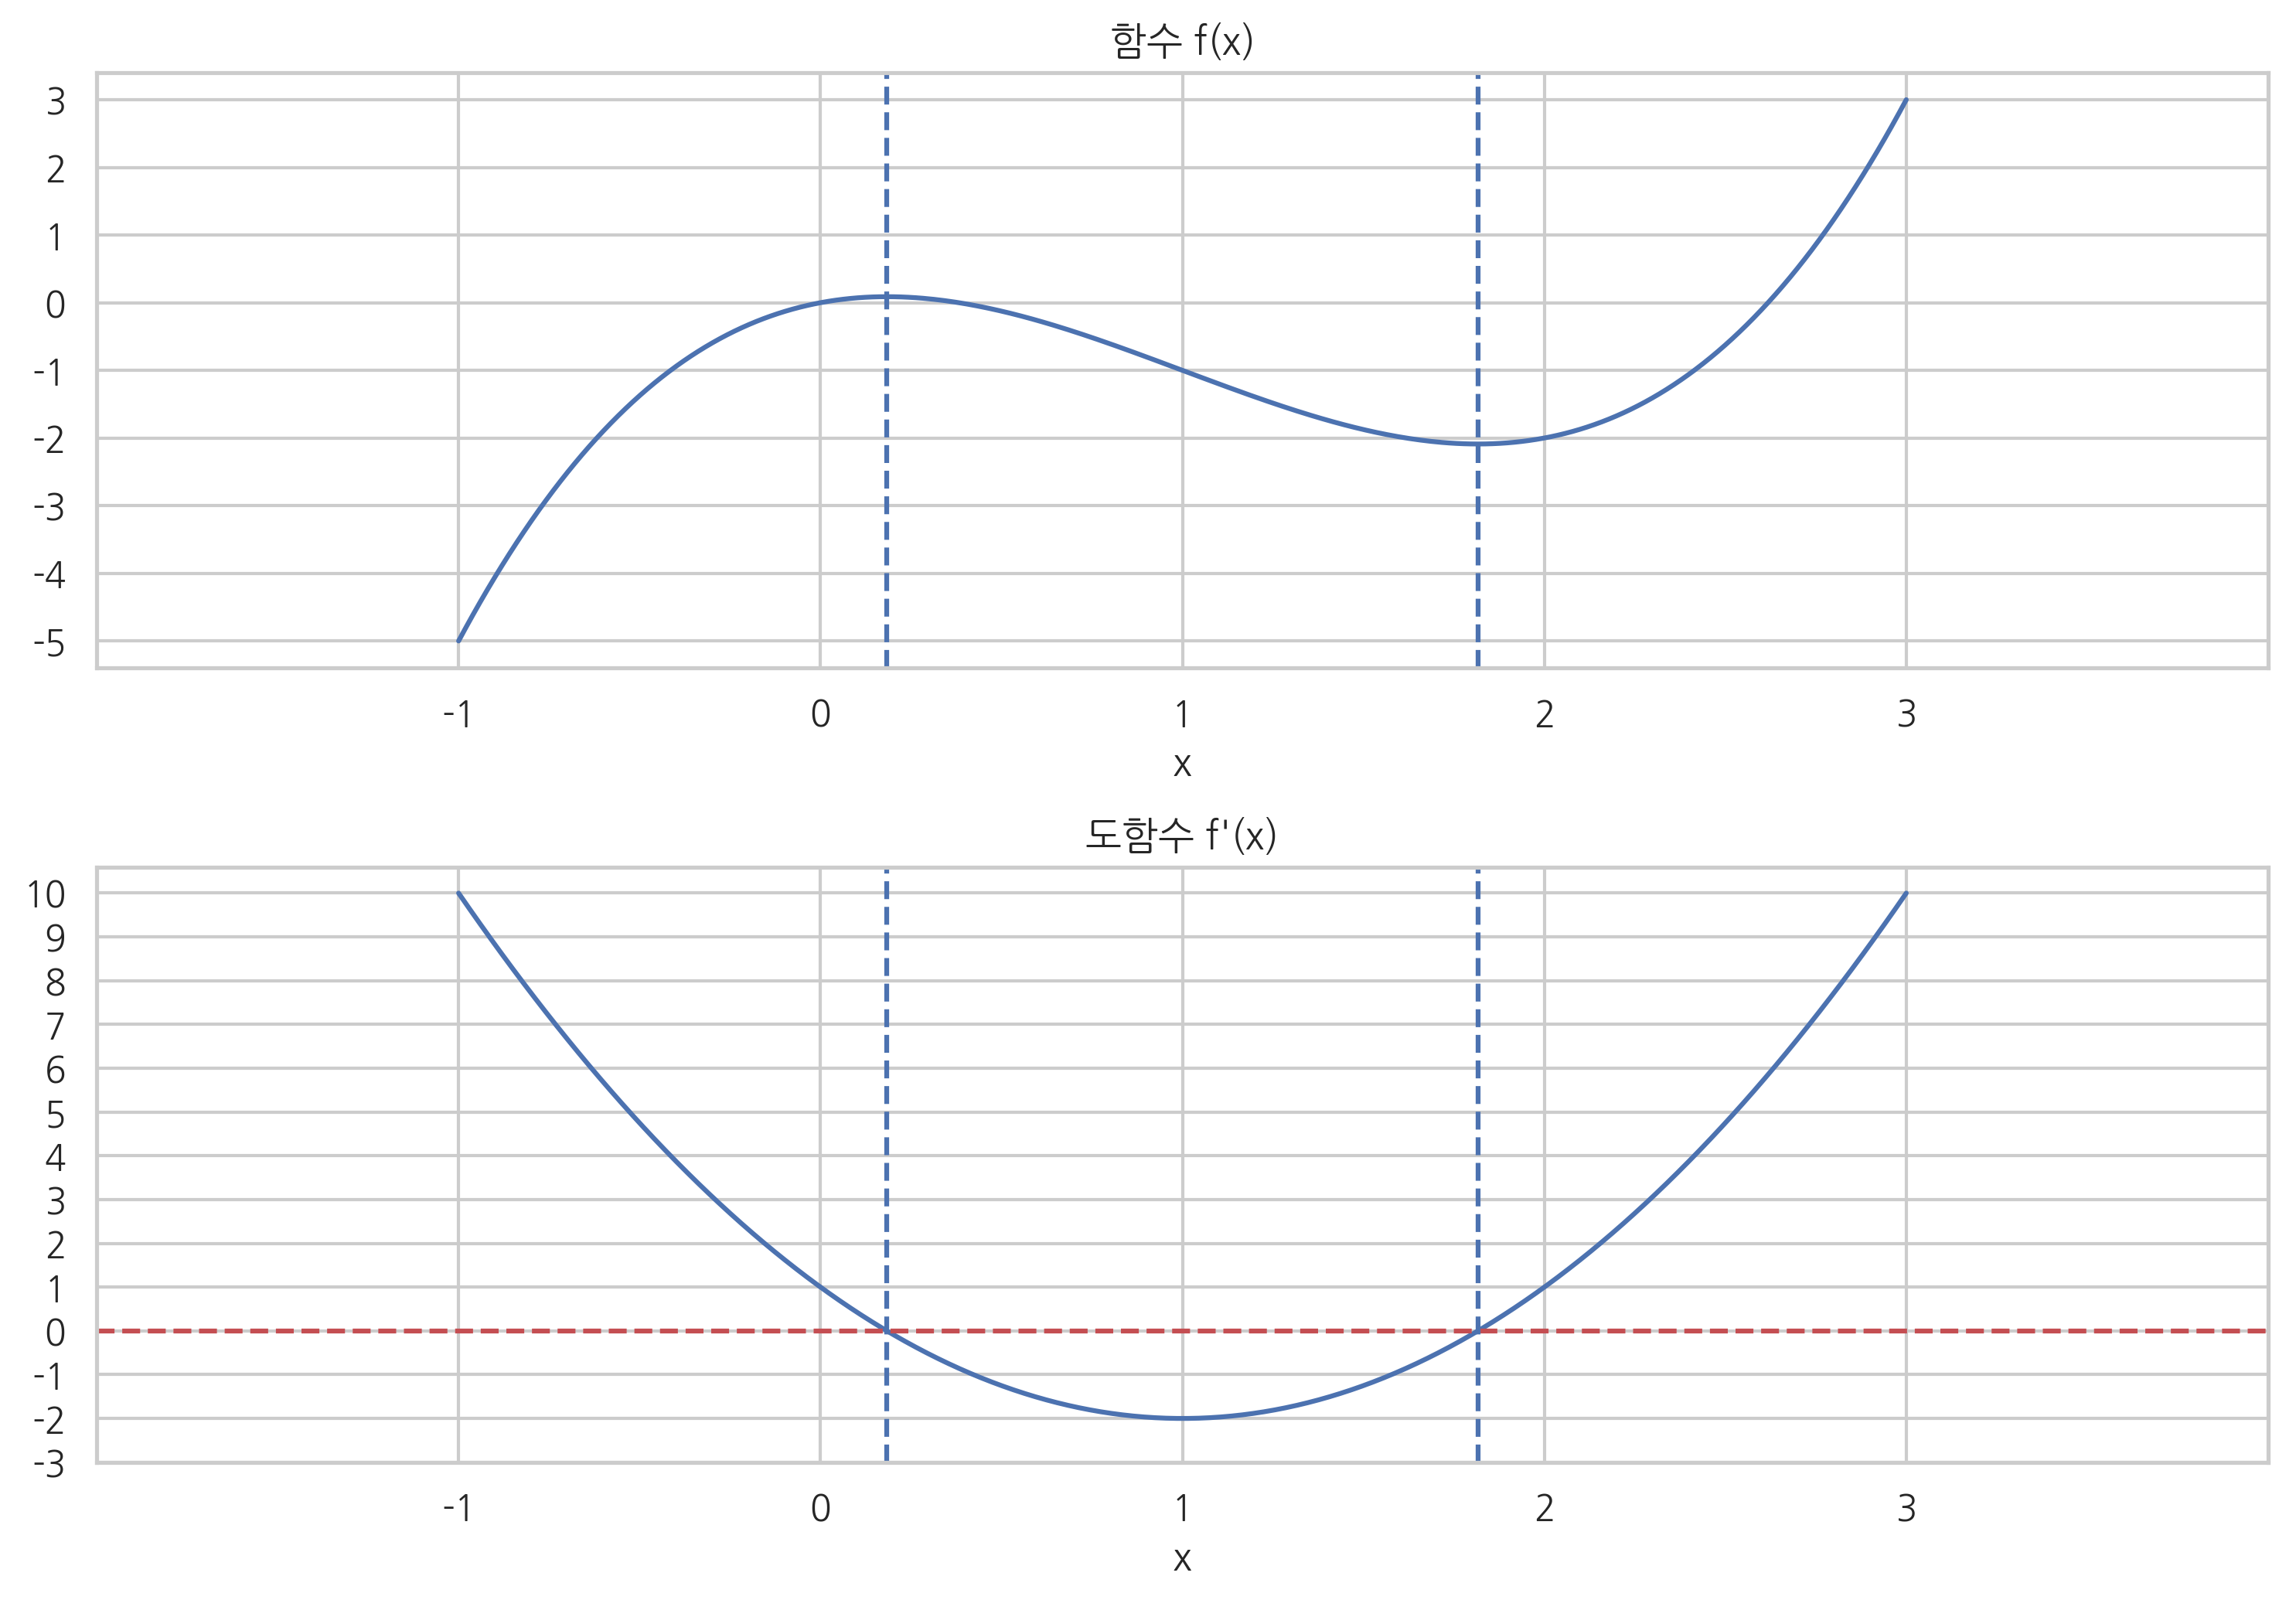

In [4]:
def fprime(x):
    return 3 * x ** 2 - 6 * x + 1

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) 

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 7))
plt.subplot(211)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.xlabel('x')
plt.title('함수 f(x)')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")

plt.subplot(212)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.xlabel('x')
plt.title("도함수 f'(x)")
plt.axhline(0, c="r", ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")

plt.tight_layout()
plt.show()

### 곱셈법칙

어떤 함수의 형태가 두 함수를 곱한 것과 같을 때는 다음과 같이 각 개별 함수의 도함수를 사용하여 원래 함수의 도함수를 구한다. 이를 **곱셈법칙**이라고 한다.

$$  
\begin{align}
\dfrac{d}{dx}\big( f  \cdot g \big) = f \cdot  \dfrac{dg}{dx} + \dfrac{df}{dx} \cdot g 
\tag{4.2.21}
\end{align}
$$

#### 예제

곱셈법칙을 사용하면 다음과 같은 함수를 미분하여,

$$
\begin{align}
f = x e^x
\tag{4.2.22}
\end{align}
$$

다음과 같은 도함수를 구한다.

$$
\begin{align}
\dfrac{df}{dx} = x e^x + e^x
\tag{4.2.23}
\end{align}
$$

### 연쇄법칙

**연쇄법칙(chain rule)**은 미분하고자 하는 함수의 입력 변수가 다른 함수의 출력 변수인 경우 적용할 수 있다.

$$ 
\begin{align}
f(x) = h(g(x))
\tag{4.2.24}
\end{align}
$$

인 경우 도함수는 다음과 같이 구한다.

$$ 
\begin{align}
\dfrac{df}{dx} = \dfrac{dh}{dg} \cdot \dfrac{dg}{dx}
\tag{4.2.25}
\end{align}
$$

#### 예제

나중에 다룰 정규분포(Gaussian normal distribution)의 확률밀도함수(probability density function)는 기본적으로 다음과 같은 형태라고 볼 수 있다.

$$
\begin{align}
f = \exp \dfrac{(x-\mu)^2}{\sigma^2}
\tag{4.2.26}
\end{align}
$$

이 함수의 도함수는 다음과 같이 구할 수 있다.


우선 위의 함수는 다음과 같이 세 개의 함수의 조합으로 생각할 수 있다. 여기에서 $y$, $z$라는 중간 변수를 임시로 정의하였다.

$$
\begin{align}
f = \exp(z) \;,\;\;\;\; z = \dfrac{y^2}{\sigma^2}   \;,\;\;\;\;   y = x-\mu
\tag{4.2.27}
\end{align}
$$

연쇄법칙을 적용하면 다음과 같다.

$$
\begin{align}
\dfrac{df}{dx} = \dfrac{df}{dz} \cdot \dfrac{dz}{dy} \cdot \dfrac{dy}{dx}
\tag{4.2.28}
\end{align}
$$

연쇄법칙에 사용된 각각의 도함수는 다음과 같다. 이때 임시로 사용된 중간 변수는 없앤다.


$$
\begin{align}
\dfrac{df}{dz} = \exp(z) = \exp \dfrac{(x-\mu)^2}{\sigma^2}
\tag{4.2.29}
\end{align}
$$


$$
\begin{align}
\dfrac{dz}{dy} =  \dfrac{2y}{\sigma^2} = \dfrac{2(x-\mu)}{\sigma^2}
\tag{4.2.30}
\end{align}
$$


$$
\begin{align}
\dfrac{dy}{dx} =  1
\tag{4.2.31}
\end{align}
$$

이 결과를 연쇄법칙에 따라 곱하면 최종적인 도함수를 구할 수 있다.

$$
\begin{align}
\dfrac{df}{dx} =  \dfrac{2(x-\mu)}{\sigma^2} \exp \dfrac{(x-\mu)^2}{\sigma^2}
\tag{4.2.32}
\end{align}
$$

#### 예제

로그 함수에 연쇄법칙을 적용하면 다음과 같은 규칙을 얻을 수 있다.

$$ 
\begin{align}
\dfrac{d}{dx} \log f(x) = \dfrac{f'(x)}{f(x)} 
\tag{4.2.33}
\end{align}
$$

#### 연습 문제 4.2.3

다음 함수를 미분하라. 이 식에서 $k$, $a$, $b$는 변수가 아니라 상수다.

(1)

$$
\begin{align}
f(x) = x^3 - 1
\tag{4.2.34}
\end{align}
$$

(2)

$$
\begin{align}
f(x) = \log (x^{2}-3k)
\tag{4.2.35}
\end{align}
$$

(3)

$$
\begin{align}
f(x) =\exp({ax^b})
\tag{4.2.36}
\end{align}
$$


### 2차 도함수

도함수를 한 번 더 미분하여 만들어진 함수를 **2차 도함수(second derivative)**라고 한다. 2차 도함수는 2개의 prime 기호($''$)를 붙이거나 $\dfrac{d^2}{dx^2}$ 기호로 표시한다.


예를 들어 $y = f(x)$라는 함수를 두 번 미분하여 구한 2차 도함수는 다음과 같이 표기한다.

$$ 
\begin{align}
f'' = \dfrac{d^2}{dx^2}(f) = \dfrac{d^2}{dx^2}f = \dfrac{d^2f}{dx^2} 
= \dfrac{d^2}{dx^2}(y) = \dfrac{d^2}{dx^2}y = \dfrac{d^2y}{dx^2} 
\tag{4.2.37}
\end{align}
$$

2차 도함수는 도함수의 기울기를 나타낸다. 즉 도함수 값이 증가하면 2차 도함수 값은 양수이고, 도함수 값이 감소하면 2차 도함수 값은 음수다.
**2차 도함수 값이 양수인 경우를 볼록(convex)하다**고 하며 2차 도함수 값이 음수인 경우를 오목(concave)하다고 한다. 이때 볼록과 오목은 아래에서 바라 본 관점이다. 그래서 2차 도함수값을 **볼록도(convexity)**라고도 부른다. 



#### 예제

다음 그래프의 함수는 $f''(x)$가 음수인 구간($ x < 1$)에서는 오목하고 $f''(x)$가 양수인 구간($ x > 1$)에서는 볼록하다.

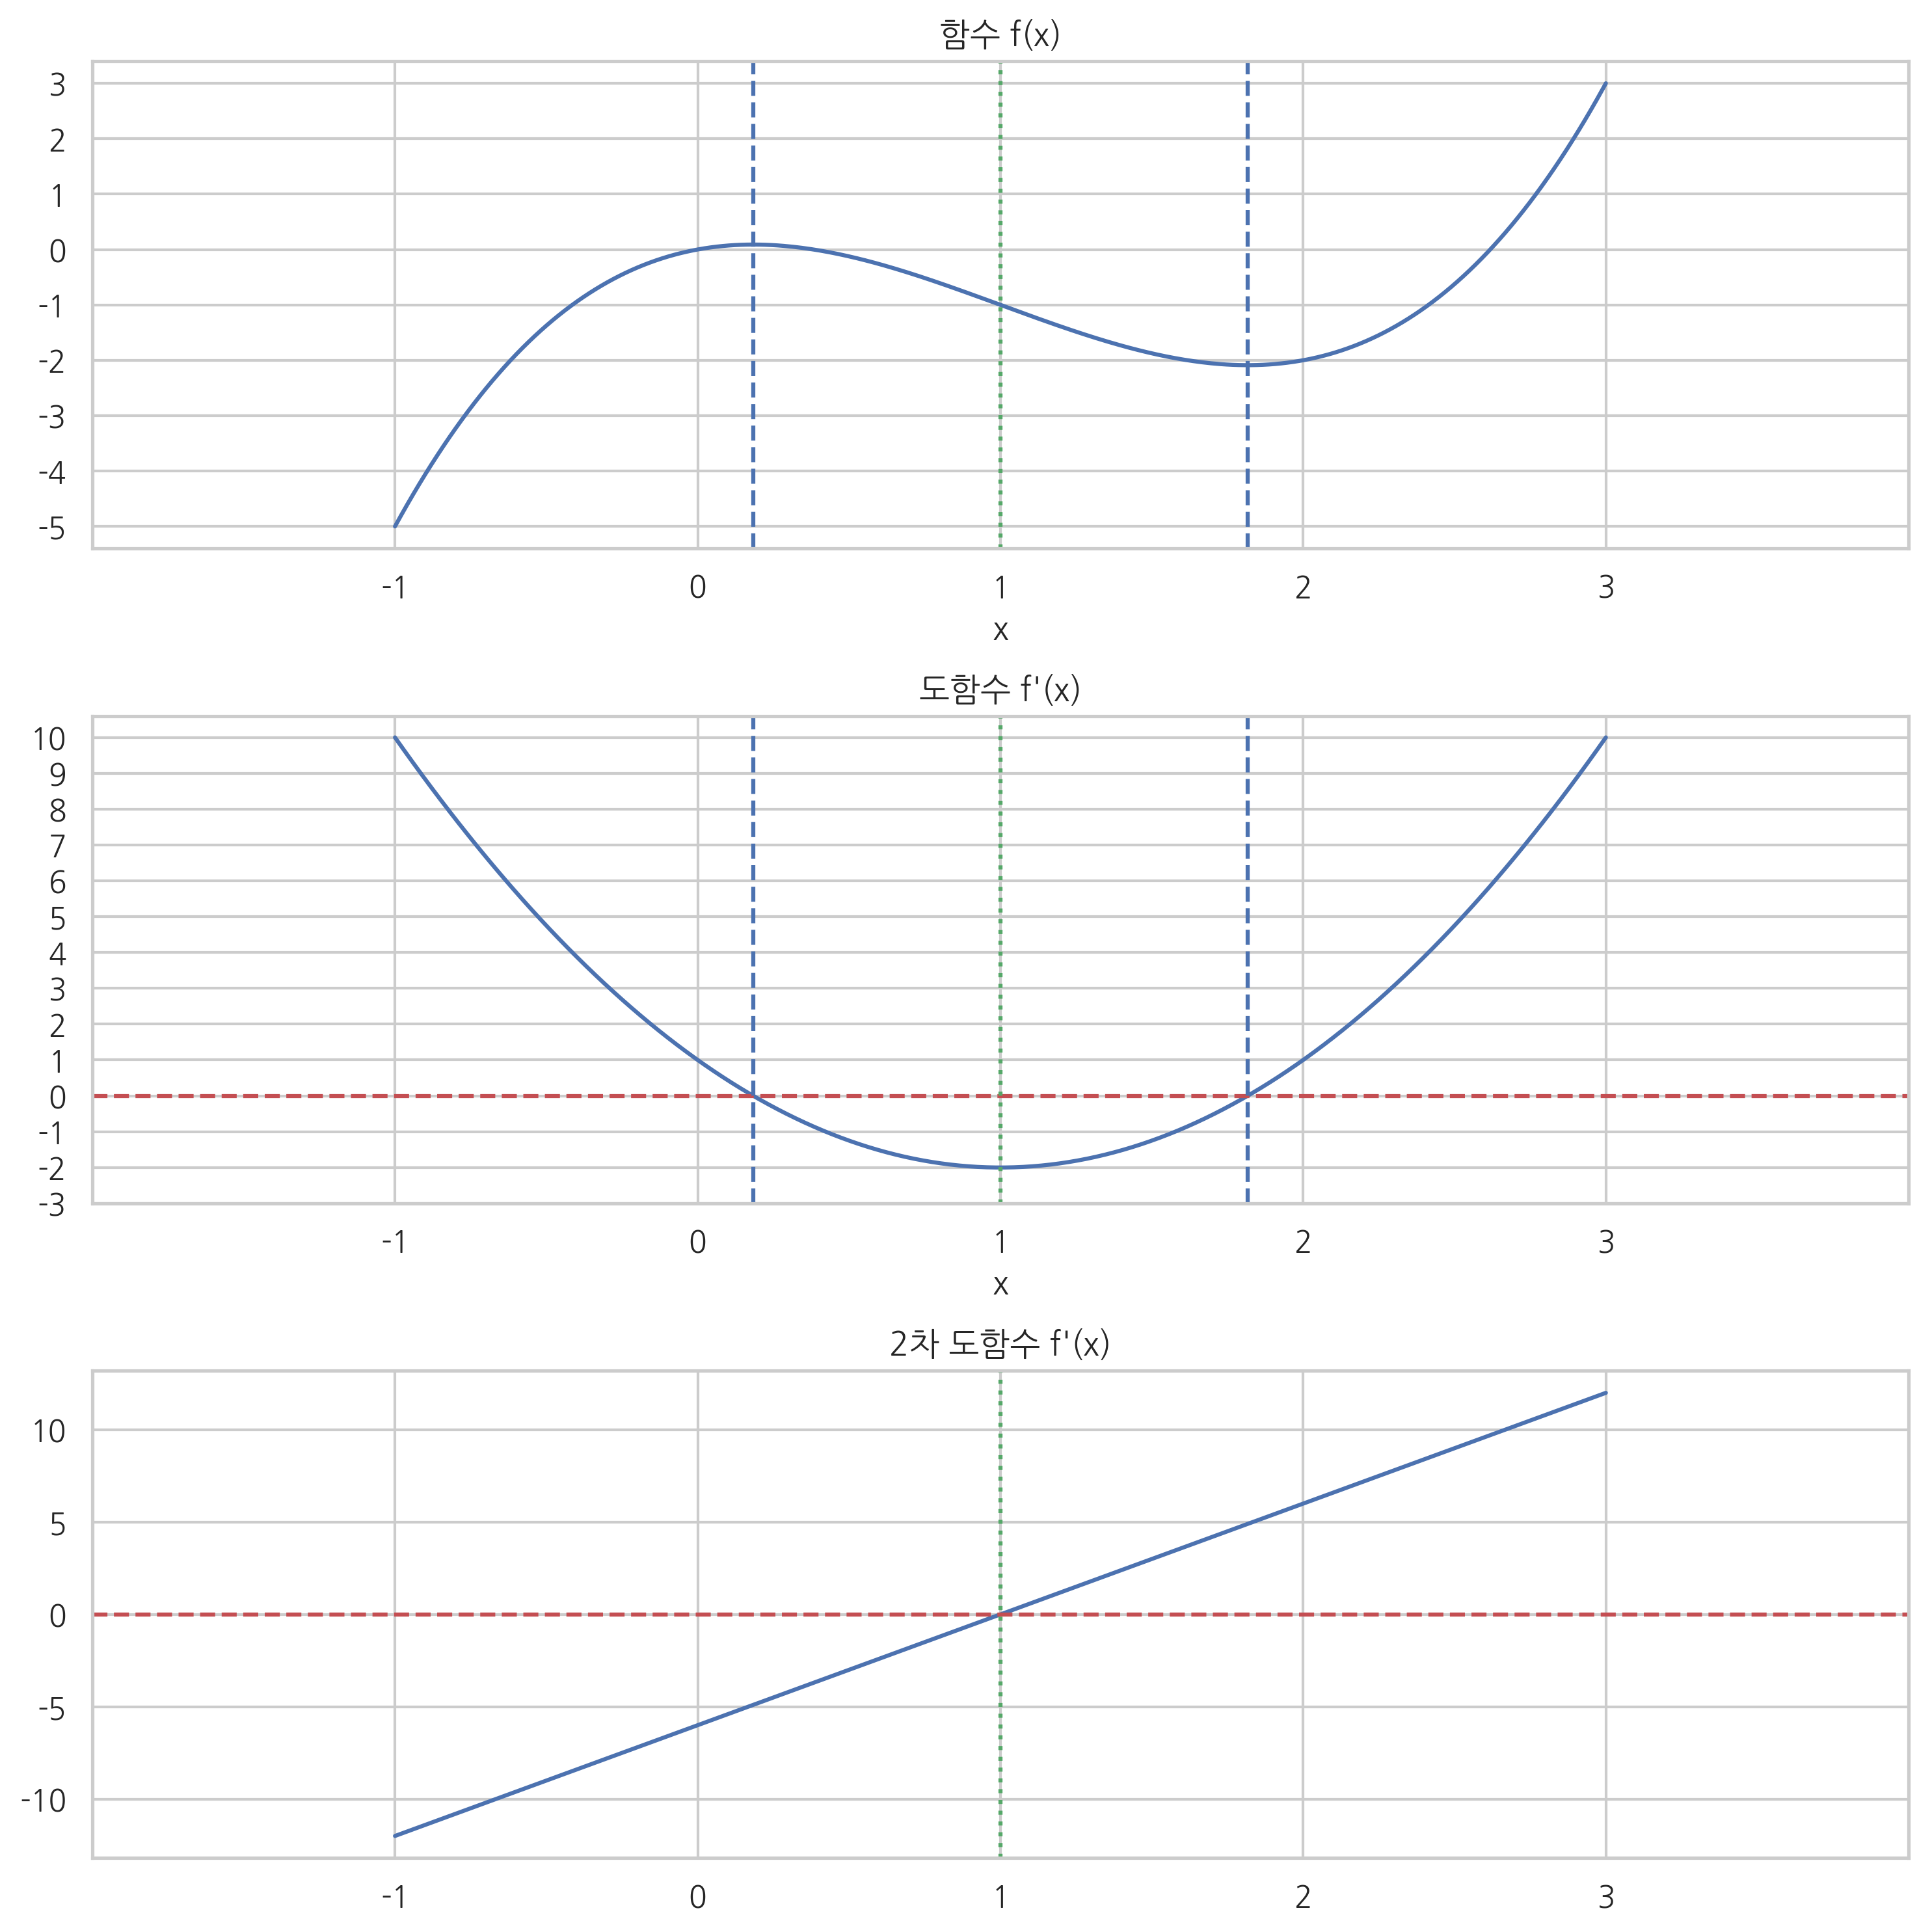

In [5]:
def fprime2(x):
    return 6*x - 6

# 2차 방정식의 근
x1, x2 = np.roots([3, -6, 1]) 

x = np.linspace(-1, 3, 400)

plt.figure(figsize=(10, 10))

plt.subplot(311)
plt.plot(x, f(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-5, 4))
plt.title('함수 f(x)')
plt.xlabel('x')
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(312)
plt.plot(x, fprime(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.yticks(np.arange(-3, 11))
plt.title("도함수 f'(x)")
plt.xlabel('x')
plt.axhline(0, c='r', ls="--")
plt.axvline(x1, c="b", ls="--")
plt.axvline(x2, c="b", ls="--")
plt.axvline(1, c="g", ls=":")

plt.subplot(313)
plt.plot(x, fprime2(x))
plt.xlim(-2, 4)
plt.xticks(np.arange(-1, 4))
plt.title("2차 도함수 f'(x)")
plt.axhline(0, c='r', ls="--")
plt.axvline(1, c="g", ls=":")

plt.tight_layout()
plt.show()

### 편미분

만약 함수가 둘 이상의 독립변수를 가지는 다변수 함수인 경우에도 미분 즉, 기울기는 하나의 변수에 대해서만 구할 수 있다. 이를 **편미분(partial differentiation)**이라고 한다. 따라서 편미분의 결과로 하나의 함수에 대해 여러 개의 도함수가 나올 수 있다.

편미분의 결과 즉 도함수는 독립 변수를 함수의 아랫첨자로 써서 표기하거나 $\partial$(round) 기호를 사용하여 표기한다. $x, y$ 두 개의 독립 변수를 가지는 함수 $f(x,y)$의 편미분 도함수는 다음과 같이 표기한다.

$$ 
\begin{align}
f_x(x,y) = \dfrac{\partial f}{\partial x}
\tag{4.2.38}
\end{align}
$$


$$ 
\begin{align}
f_y(x,y) = \dfrac{\partial f}{\partial y} 
\tag{4.2.39}
\end{align}
$$


편미분을 하는 방법은 변수가 하나인 함수의 미분과 같다. 다만 **어떤 하나의 독립 변수에 대해 미분할 때는 다른 독립 변수를 상수로 생각하면 된다**. 예를 들어 $x$, $y$ 라는 두 독립 변수를 가지는 함수에서 $x$로 편미분을 할 때는 $y$는 독립 변수가 아닌 상수로 생각한다. 마찬가지로 $y$로 편미분을 할 때는 $x$는 독립 변수가 아닌 상수로 생각한다.

<img src="https://datascienceschool.net/upfiles/816e894c32d24a458872a18b92e384c4.png" style="width:100%;">

그림 4.2.3 : 편미분의 방법

#### 예제

다음은 편미분의 간단한 예다.

$$
\begin{align}
f(x,y) = x^2 + 4xy + 4y^2
\tag{4.2.40}
\end{align}
$$

$$
\begin{align}
f_x(x,y) = \dfrac{\partial f}{\partial x} = 2x + 4y
\tag{4.2.41}
\end{align}
$$

$$
\begin{align}
f_y(x,y) = \dfrac{\partial f}{\partial y} = 4x + 8y
\tag{4.2.42}
\end{align}
$$


### 다변수 함수의 연쇄법칙

다변수 함수의 미분을 구할 때도 함수가 연결되어 있으면 연쇄법칙이 적용된다. 예를 들어 변수 $x$를 입력으로 가지는 함수가 $f_1, f_2, \ldots, f_N$과 같이 $N$개가 있고 각각의 출력을 $y_1, y_2, \ldots, y_N$이라고 하자.

$$ 
\begin{align}
\begin{aligned}
y_1 &= f_1(x) \\
y_2 &= f_2(x) \\
 & \vdots \\
y_N &= f_N(x) 
\end{aligned}
\tag{4.2.43}
\end{align}
$$


그리고 이 $y_1, y_2, \ldots, y_N$값에 의존하는 다른 함수 $g$가 있다고 하자. $g$의 출력은 $z$라고 한다.

$$
\begin{align}
z = g(y_1, y_2, \ldots, y_N)
\tag{4.2.44}
\end{align}
$$

이때 변수 $x$ 값의 변화에 따른 $z$ 값의 변화는 다음처럼 계산한다.

$$ 
\begin{align}
\dfrac{dz}{dx} 
= \dfrac{\partial z}{\partial y_1}\dfrac{dy_1}{dx} + 
  \dfrac{\partial z}{\partial y_2}\dfrac{dy_2}{dx} + \cdots
+ \dfrac{\partial z}{\partial y_N}\dfrac{dy_N}{dx} 
\tag{4.2.45}
\end{align}
$$

이번에는 함수 $f_1, f_2, \ldots, f_N$가 $x_1, x_2, \ldots, x_M$을 입력으로 가지는 다변수 함수라고 하자. 

$$ 
\begin{align}
\begin{aligned}
y_1 &= f_1(x_1, x_2, \ldots, x_M) \\
y_2 &= f_2(x_1, x_2, \ldots, x_M) \\
 & \vdots \\
y_N &= f_N(x_1, x_2, \ldots, x_M) 
\end{aligned}
\tag{4.2.46}
\end{align}
$$

이때의 변수 $x_1$ 값의 변화에 따른 $z$ 값의 변화도 마찬가지로 계산할 수 있다.

$$ 
\begin{align}
\dfrac{\partial z}{\partial x_1} 
= \dfrac{\partial z}{\partial y_1}\dfrac{\partial y_1}{\partial x_1} + 
  \dfrac{\partial z}{\partial y_2}\dfrac{\partial y_2}{\partial x_1} + \cdots
+ \dfrac{\partial z}{\partial y_N}\dfrac{\partial y_N}{\partial x_1}  
\tag{4.2.47}
\end{align}
$$

### 2차 편미분

편미분에 대해서도 2차 도함수를 정의할 수 있다. 편미분의 2차 도함수를 구할 때는 각각의 미분에 쓰이는 독립 변수를 자유롭게 선택할 수 있다. 

첫번째 미분과 두번째 미분에서 모두 $x$에 대해 미분하면 다음과 같이 표기한다.

$$ 
\begin{align}
f_{xx}(x,y) = \dfrac{\partial^2 f}{\partial x^2} 
\tag{4.2.48}
\end{align}
$$

첫번째 미분과 두번째 미분에서 모두 $y$에 대해 미분하면 다음과 같이 표기한다.

$$ 
\begin{align}
f_{yy}(x,y) = \dfrac{\partial^2 f}{\partial y^2}
\tag{4.2.49}
\end{align}
$$

첫번째 미분에서는 $x$에 대해 미분하고 두번째 미분에서는 $y$에 대해 미분하면 다음과 같이 표기한다.

$$ 
\begin{align}
f_{xy}(x,y) = \dfrac{\partial^2 f}{\partial y \partial x} 
\tag{4.2.50}
\end{align}
$$

첫번째 미분에서는 $y$에 대해 미분하고 두번째 미분에서는 $x$에 대해 미분하면 다음과 같이 표기한다.

$$ 
\begin{align}
f_{yx}(x,y) = \dfrac{\partial^2 f}{\partial x \partial y}
\tag{4.2.51}
\end{align}
$$


위 결과에서 $x$로 먼저 미분하고 나중에 $y$로 미분한 2차 도함수 $f_{xy}$는  $y$로 먼저 미분하고 나중에 $x$로 미분한 2차 도함수 $f_{yx}$와 같다. 만약 함수가 연속이고 미분 가능하면 미분의 순서는 상관없다. 이를 **슈와르츠 정리(Schwarz's theorem)**라고 한다.

#### 예제

위 다변수 함수에 대해 일차 및 이차 편미분 도함수를 구하면 다음과 같다.

$$
\begin{align}
f_{xx}(x,y) = 2
\tag{4.2.52}
\end{align}
$$

$$
\begin{align}
f_{yy}(x,y) = 8
\tag{4.2.53}
\end{align}
$$

$$
\begin{align}
f_{xy}(x,y) = 4
\tag{4.2.54}
\end{align}
$$

$$
\begin{align}
f_{yx}(x,y) = 4
\tag{4.2.55}
\end{align}
$$

슈와르츠 정리가 성립함을 알 수 있다.

#### 연습 문제 4.2.4

다음 함수에 대한 1차/2차 편미분 $f_x$, $f_y$, $f_{xx}$, $f_{xy}$, $f_{yx}$, $f_{yy}$를 구하라.

$$
\begin{align}
f(x, y) = \exp{(x^2 + 2y^2)}
\tag{4.2.56}
\end{align}
$$

### 테일러 전개

함수의 기울기(1차 미분값)를 알고 있다면 함수의 모양을 다음처럼 근사화할 수 있다. $x_0$는 함수값과 기울기를 구하는 $x$ 위치이며 사용자가 마음대로 설정할 수 있다.

$$ 
\begin{align}
f(x) \approx f(x_0) + \dfrac{df(x_0)}{dx}(x - x_0)
\tag{4.2.57}
\end{align}
$$

이를 **테일러 전개(Taylor expansion)**라고 한다. 다변수 함수의 경우에는 다음처럼 테일러 전개를 한다.

$$ 
\begin{align}
f(x, y) \approx f(x_0, y_0) 
+ \dfrac{\partial f(x_0, y_0)}{\partial x}(x - x_0)
+ \dfrac{\partial f(x_0, y_0)}{\partial y}(y - y_0)
\tag{4.2.58}
\end{align}
$$


### 심파이(SymPy)

심파이는 **심볼릭 연산(symbolic operation)**을 지원하는 파이썬 패키지다. 심볼릭 연산이란 사람이 연필로 계산하는 미분/적분과 동일한 형태의 연산을 말한다. 즉, $x^2$의 미분 연산을 수행하면 그 결과가 $2x$란 형태로 출력된다. 딥 러닝(deep learning) 등에 많이 사용되는 파이썬의 tensorflow 패키지나 pytorch 패키지도 기울기 함수 계산을 위해 이러한 심볼릭 연산 기능을 갖추고 있다. 

In [6]:
import sympy

# Juypter 노트북에서 수학식의 LaTeX 표현을 위해 필요함
sympy.init_printing(use_latex='mathjax')

심볼릭 연산에서 사용하는 **심볼릭 변수(symbolic variable)**는 일반 프로그래밍에서 사용하는 변수와 다르다. 일반 프로그래밍에서 사용하는 변수는 이미 메모리에 씌여 있는 어떤 숫자를 기호로 쓴 것에 지나지 않지만 심볼릭 변수는 아무런 숫자도 대입이 되어 있지 않다. 따라서 $x^2$의 미분 연산을 수행하려면 우선 SymPy의 `symbols()` 명령을 사용하여 $x$라는 기호가 단순한 숫자나 벡터 변수가 아닌 심볼(symbol)임을 알려주어야 한다. 이렇게 정의된 심볼 변수는 `Symbol` 클래스 자료형이 된다.

In [7]:
x = sympy.symbols('x')
x

x

In [8]:
type(x)

sympy.core.symbol.Symbol

일단 심볼 변수를 정의하면 이를 사용하여 다음과 같이 함수를 정의한다. 이때 수학 함수는 심파이 전용 함수를 사용해야 한다.

In [9]:
f = x * sympy.exp(x)
f

   x
x⋅ℯ 

함수가 정의되면 `diff()` 함수로 미분을 할 수 있다. 또한 `simplify()` 함수를 써서 소인수분해 등을 통한 수식 정리가 가능하다.

In [10]:
sympy.diff(f)

   x    x
x⋅ℯ  + ℯ 

In [11]:
sympy.simplify(sympy.diff(f))

         x
(x + 1)⋅ℯ 

편미분을 하는 경우에는 어떤 변수로 미분하는지를 `diff()` 함수에 명시해야 한다. `symbols()` 명령을 사용할 때는 인수로 주는 문자열에 여러개의 심볼 변수를 동시에 넣을 수도 있다.

In [12]:
x, y = sympy.symbols('x y')
f = x ** 2 + 4 * x * y + 4 * y ** 2
f

 2              2
x  + 4⋅x⋅y + 4⋅y 

In [13]:
sympy.diff(f, x)

2⋅x + 4⋅y

In [14]:
sympy.diff(f, y)

4⋅x + 8⋅y

상수 심볼을 포함하는 함수를 미분하는 경우, 심파이는 어떤 심볼이 상수이고 어떤 심볼이 변수인지 알 수 없기 때문에 편미분인 것처럼 입력 변수를 지정해야 한다.

In [15]:
x, mu, sigma = sympy.symbols('x mu sigma')
f = sympy.exp((x - mu) ** 2 / sigma ** 2)
f

         2
 (-μ + x) 
 ─────────
      2   
     σ    
ℯ         

In [16]:
sympy.diff(f, x)

                      2
              (-μ + x) 
              ─────────
                   2   
                  σ    
(-2⋅μ + 2⋅x)⋅ℯ         
───────────────────────
            2          
           σ           

In [17]:
sympy.simplify(sympy.diff(f, x))

                   2
            (μ - x) 
            ────────
                2   
               σ    
2⋅(-μ + x)⋅ℯ        
────────────────────
          2         
         σ          

이차 도함수는 다음처럼 구한다.

In [18]:
sympy.diff(f, x, x)

                           2
                    (μ - x) 
                    ────────
  ⎛             2⎞      2   
  ⎜    2⋅(μ - x) ⎟     σ    
2⋅⎜1 + ──────────⎟⋅ℯ        
  ⎜         2    ⎟          
  ⎝        σ     ⎠          
────────────────────────────
              2             
             σ              

#### 연습 문제 4.2.5

다음 함수를 미분한 도함수를 심파이를 사용하여 구하라. 여기에서 $k$, $a$, $b$는 변수가 아니라 상수다.

(1) 

$$
\begin{align}
f(x) = x^3 - 1
\tag{4.2.59}
\end{align}
$$

(2) 

$$
\begin{align}
f(x) = \log (x^{2}-3k)
\tag{4.2.60}
\end{align}
$$

(3)

$$
\begin{align}
f(x) =\exp({ax^b})
\tag{4.2.61}
\end{align}
$$


#### 연습 문제 4.2.6

다음 함수에 대한 1차/2차 편미분 $f_x$, $f_y$, $f_{xx}$, $f_{xy}$, $f_{yx}$, $f_{yy}$를 심파이로 구하라.

$$
\begin{align}
f(x, y) = \exp{(x^2 + 2y^2)}
\tag{4.2.62}
\end{align}
$$